In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"E:\FILES\New folder\Excel Tutioral\New Datasets\The Complete Pokemon Dataset\Pokemon.csv", index_col=0)

In [3]:
df.head()

,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
number,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1072 entries, 1 to 898
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        1072 non-null   object
 1   type1       1072 non-null   object
 2   type2       574 non-null    object
 3   total       1072 non-null   int64 
 4   hp          1072 non-null   int64 
 5   attack      1072 non-null   int64 
 6   defense     1072 non-null   int64 
 7   sp_attack   1072 non-null   int64 
 8   sp_defense  1072 non-null   int64 
 9   speed       1072 non-null   int64 
 10  generation  1072 non-null   int64 
 11  legendary   1072 non-null   bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 101.5+ KB


In [5]:
df.isnull().sum()

name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [6]:
df.apply(lambda x: x.dtype)

name          object
type1         object
type2         object
total          int64
hp             int64
attack         int64
defense        int64
sp_attack      int64
sp_defense     int64
speed          int64
generation     int64
legendary       bool
dtype: object

In [7]:
df.columns

Index(['name', 'type1', 'type2', 'total', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'generation', 'legendary'],
      dtype='object')

In [8]:
df.columns.to_series().groupby(df.dtypes).groups

{bool: ['legendary'], int64: ['total', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'generation'], object: ['name', 'type1', 'type2']}

In [9]:
round((df.apply(lambda x:x.isnull().sum())/len(df))*100,2)

name           0.00
type1          0.00
type2         46.46
total          0.00
hp             0.00
attack         0.00
defense        0.00
sp_attack      0.00
sp_defense     0.00
speed          0.00
generation     0.00
legendary      0.00
dtype: float64

In [10]:
#Checking for percentage of missing values in each columns
(df.isnull().sum()/len(df))*100

name           0.000000
type1          0.000000
type2         46.455224
total          0.000000
hp             0.000000
attack         0.000000
defense        0.000000
sp_attack      0.000000
sp_defense     0.000000
speed          0.000000
generation     0.000000
legendary      0.000000
dtype: float64

In [11]:
total_miss = df.isnull().sum()
perc_miss = total_miss/df.isnull().count()*100

missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':perc_miss})

missing_data.sort_values(by='Total missing',ascending=False).head(3)

,Total missing,% missing
type2,498,46.455224
name,0,0.000000
type1,0,0.000000


In [12]:
print('Unique Values for Each Feature: \n')
for i in df.columns:
    print(i, ':',df[i].nunique())

Unique Values for Each Feature: 

name : 1072
type1 : 20
type2 : 18
total : 219
hp : 103
attack : 123
defense : 114
sp_attack : 119
sp_defense : 107
speed : 127
generation : 9
legendary : 2


In [13]:
# find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

name
['Bulbasaur' 'Ivysaur' 'Venusaur' ... 'Calyrex' 'Ice Rider Calyrex'
 'Shadow Rider Calyrex']
type1
['Grass' 'Fire' 'Water' 'Blastoise' 'Bug' 'Normal' 'Dark' 'Poison'
 'Electric' 'Ground' 'Ice' 'Fairy' 'Steel' 'Fighting' 'Psychic' 'Rock'
 'Ghost' 'Dragon' 'Flying' 'Graass']
type2
['Poison' nan 'Flying' 'Dragon' 'Water' 'Normal' 'Psychic' 'Steel'
 'Ground' 'Fairy' 'Grass' 'Fighting' 'Electric' 'Ice' 'Dark' 'Ghost'
 'Rock' 'Fire' 'Bug']


In [14]:
numerical_data = df.select_dtypes(include=np.number) # select_dtypes selects data with numeric features
numerical_col = numerical_data.columns 

print("Numeric Features:")
print(numerical_data.head())
print("===="*20)

Numeric Features:
        total  hp  attack  defense  sp_attack  sp_defense  speed  generation
number                                                                      
1         318  45      49       49         65          65     45           1
2         405  60      62       63         80          80     60           1
3         525  80      82       83        100         100     80           1
3         625  80     100      123        122         120     80           1
3         525  80      82       83        100         100     80           1


In [15]:
categorical_data = df.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns                          # we will store the categorical features in a variable

print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
                       name  type1   type2  legendary
number                                               
1                 Bulbasaur  Grass  Poison      False
2                   Ivysaur  Grass  Poison      False
3                  Venusaur  Grass  Poison      False
3             Mega Venusaur  Grass  Poison      False
3       Gigantamax Venusaur  Grass  Poison      False


In [16]:
categorical_features = [feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['Speed']))]
categorical_features

['name', 'type1', 'type2']

In [17]:
### numerical 
numerical_cols = list(df.select_dtypes(exclude=['object']))
numerical_cols

['total',
 'hp',
 'attack',
 'defense',
 'sp_attack',
 'sp_defense',
 'speed',
 'generation',
 'legendary']

In [18]:
### categorical
categorical_cols = list(df.select_dtypes(include=['object']))
categorical_cols

['name', 'type1', 'type2']

In [19]:
df.describe()

,total,hp,attack,defense,sp_attack,sp_defense,speed,generation
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000
mean,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776
std,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472
min,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000
25%,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000
50%,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000
75%,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000
max,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,8.000000


In [20]:
df.corr()

,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
total,1.000000,0.651252,0.734482,0.630341,0.727108,0.714301,0.553456,0.079992,0.515738
hp,0.651252,1.000000,0.455366,0.302501,0.361150,0.388298,0.176025,0.074719,0.335003
attack,0.734482,0.455366,1.000000,0.460603,0.362070,0.260817,0.364312,0.093628,0.343277
defense,0.630341,0.302501,0.460603,1.000000,0.219260,0.535930,0.003361,0.062962,0.280790
sp_attack,0.727108,0.361150,0.362070,0.219260,1.000000,0.506912,0.436697,0.034237,0.400535
sp_defense,0.714301,0.388298,0.260817,0.535930,0.506912,1.000000,0.219889,0.040233,0.360667
speed,0.553456,0.176025,0.364312,0.003361,0.436697,0.219889,1.000000,0.015538,0.349920
generation,0.079992,0.074719,0.093628,0.062962,0.034237,0.040233,0.015538,1.000000,0.100667
legendary,0.515738,0.335003,0.343277,0.280790,0.400535,0.360667,0.349920,0.100667,1.000000


<AxesSubplot:>

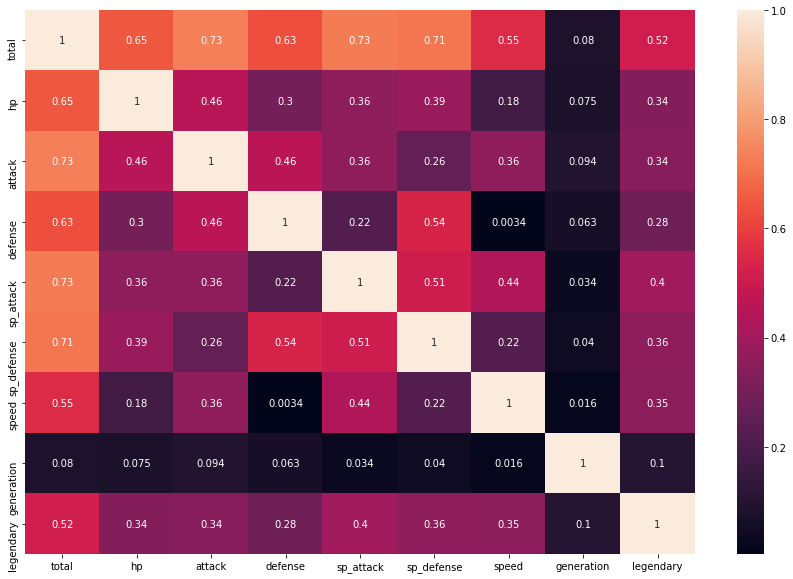

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

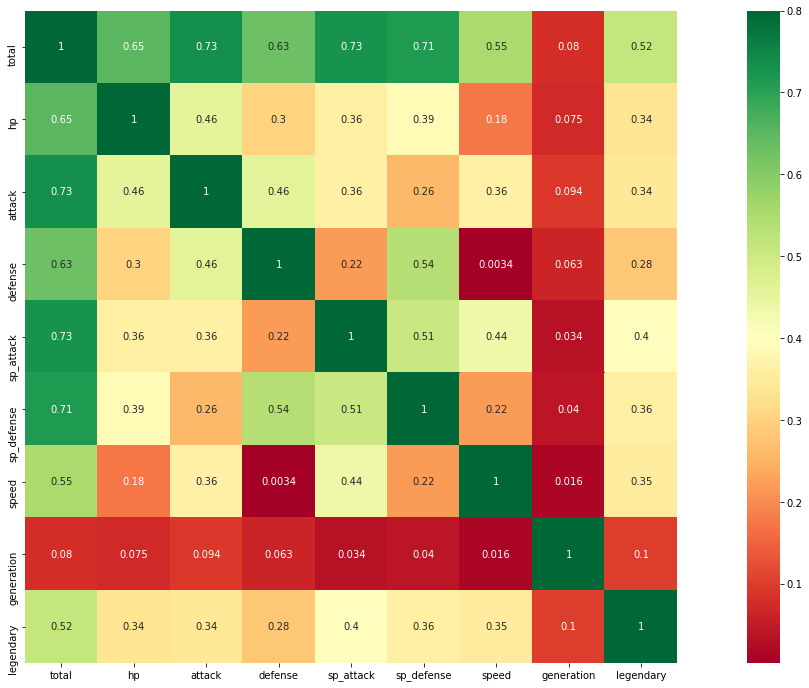

In [22]:
matrix = df.corr() 
f, ax = plt.subplots(figsize=(25, 12)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="RdYlGn",annot = True);

In [ ]:
sns.pairplot(df)

In [ ]:
def bar_plot(variable):
    var = df[variable]
    varValue = var.value_counts()
    plt.figure(figsize=(15,3))
    plt.bar(varValue.index, varValue,color=['#00008b','#00e5ee','#cd1076', '#008080','#cd5555','red','blue'])
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    
    plt.show()
    print("{}: \n {}".format(variable,varValue))

In [ ]:
categorical_cols = ['type1', 'type2']
for c in categorical_cols:
    bar_plot(c)

In [ ]:
sns.lmplot(x = 'attack', y = 'defense', data = df)

In [ ]:
sns.lmplot(x = 'attack', y = 'defense', data = df,
           fit_reg = False, # No regression line
           hue = 'speed') # Color by evolution stage
plt.ylim(0, None)
plt.xlim(0, None)

In [ ]:
plt.figure(figsize = (15,10))
sns.boxplot(data = df)

In [ ]:
plt.figure(figsize = (10,10))
# Pre-format DataFrame
stats_df = df.drop(['total', 'speed', 'legendary'], axis = 1)
 
# New boxplot using stats_df
sns.boxplot(data = stats_df)

In [ ]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

In [ ]:
plt.figure(figsize = (15,10))

# Violin plot with Pokemon color palette
sns.violinplot(x = 'type1', y = 'attack', data = df, palette = pkmn_type_colors) # Set color palette

In [ ]:
plt.figure(figsize = (15,10))

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x = 'type1', y = 'attack', data = df)

In [ ]:
plt.figure(figsize = (15,10))

# Swarm plot with Pokemon color palette
sns.swarmplot(x = 'type1', y = 'attack', data = df, palette = pkmn_type_colors)

In [ ]:
plt.figure(figsize = (15,10))

# Create plot
sns.violinplot(x = 'type1', y = 'attack', data = df, inner = None, # Remove the bars inside the violins
               palette = pkmn_type_colors)
 
sns.swarmplot(x = 'type1', y = 'attack', data = df, color = 'k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [ ]:
plt.figure(figsize = (15,10))

# Violin plot with Pokemon color palette
sns.violinplot(x = 'type2', y = 'attack', data = df, palette = pkmn_type_colors) # Set color palette

In [ ]:
plt.figure(figsize = (15,10))

# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x = 'type2', y = 'attack', data = df)

In [ ]:
plt.figure(figsize = (15,10))

# Swarm plot with Pokemon color palette
sns.swarmplot(x = 'type2', y = 'attack', data = df, palette = pkmn_type_colors)

In [ ]:
plt.figure(figsize = (15,10))

# Create plot
sns.violinplot(x = 'type2', y = 'attack', data = df, inner = None, # Remove the bars inside the violins
               palette = pkmn_type_colors)
 
sns.swarmplot(x = 'type2', y = 'attack', data = df, color = 'k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [ ]:
stats_df.head()

In [ ]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars = ["name", "type1", "type2"], # Variables to keep
                    var_name = "speed") # Name of melted variable
melted_df.head()

In [ ]:
print( stats_df.shape )
print( melted_df.shape )

In [ ]:
plt.figure(figsize = (15,10))

# Swarmplot with melted_df
sns.swarmplot(x = 'speed', y = 'value', data = melted_df, hue = 'type1')

In [ ]:
plt.figure(figsize = (15,10))

# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

In [ ]:
plt.figure(figsize = (15,10))

# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.attack)

In [ ]:
plt.figure(figsize = (15,10))

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x = 'type1', data = df, palette = pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation = -45)

In [ ]:
plt.figure(figsize = (15,10))

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x = 'type2', data = df, palette = pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation = -45)

In [ ]:
# Density Plot
sns.kdeplot(df.attack, df.defense)

In [ ]:
# Joint Distribution Plot
sns.jointplot(x = 'attack', y = 'defense', data = df)